# Exercise 
### Examine and Validate different cross validation approaches

Using a dataset of your own, explore the data utilizing multiple cross-validation techniques. Choose the most appropriate cross-validation technique for your data. In your initial post, describe your data, state which cross-validation technique you used, and explain your rationale for deciding on which cross-validation technique was the most appropriate for your specific dataset.

Respond to other learners and ask questions that extend the conversation.

## Abalone
### Donated on 11/30/1995

Additional Information
Predicting the age of abalone from physical measurements.  The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task.  Other measurements, which are easier to obtain, are used to predict the age.  Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.

From the original data examples with missing values were removed (the majority having the predicted value missing), and the ranges of the continuous values have been scaled for use with an ANN (by dividing by 200).

## Data Loading

In this section, we load the Abalone dataset from the UCI Machine Learning Repository using the `fetch_ucirepo` function. The Abalone dataset contains physical measurements of abalone that will be used to predict their age (represented by the number of rings).

The dataset is split into:
- Features (X): Physical measurements of the abalone
- Targets (y): The number of rings, which indicates the age of the abalone

We also print the metadata and variable information to understand the dataset structure.

In [61]:
from ucimlrepo import fetch_ucirepo 

  
# fetch dataset 
abalone = fetch_ucirepo(id=1) 
  
# data (as pandas dataframes) 
X = abalone.data.features 
y = abalone.data.targets 
  
# metadata 
print(abalone.metadata) 
  
# variable information 
print(abalone.variables)

{'uci_id': 1, 'name': 'Abalone', 'repository_url': 'https://archive.ics.uci.edu/dataset/1/abalone', 'data_url': 'https://archive.ics.uci.edu/static/public/1/data.csv', 'abstract': 'Predict the age of abalone from physical measurements', 'area': 'Biology', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Tabular'], 'num_instances': 4177, 'num_features': 8, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': [], 'target_col': ['Rings'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1994, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C55C7W', 'creators': ['Warwick Nash', 'Tracy Sellers', 'Simon Talbot', 'Andrew Cawthorn', 'Wes Ford'], 'intro_paper': None, 'additional_info': {'summary': 'Predicting the age of abalone from physical measurements.  The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- 

## Library Imports

Here we import all the necessary libraries for our analysis:

### Data Manipulation and Visualization
- **seaborn** and **matplotlib.pyplot**: For creating statistical visualizations
- **plotly.express**: For interactive visualizations
- **numpy**: For numerical operations
- **pandas**: For data manipulation and analysis

### Machine Learning Libraries (scikit-learn)
- **feature_selection**: For selecting relevant features
- **inspection**: For model inspection tools like permutation_importance
- **pipeline**: For creating processing pipelines
- **compose**: For combining different transformers
- **preprocessing**: For data preprocessing (OneHotEncoder, PolynomialFeatures, StandardScaler)
- **linear_model**: For regression models (LinearRegression, Lasso, Ridge)
- **model_selection**: For cross-validation techniques (train_test_split, GridSearchCV)
- **metrics**: For evaluation metrics (mean_squared_error, r2_score)

We also configure scikit-learn to display pipelines as diagrams for better visualization.


In [62]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import pandas as pd

from sklearn.feature_selection import SequentialFeatureSelector, SelectFromModel
from sklearn.inspection import permutation_importance
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

from sklearn import set_config
set_config(display="diagram") #setting this will display your pipelines as seen above

## Data Exploration

In this section, we prepare the data for analysis and explore its structure:

1. We merge the features (X) and targets (y) into a single dataframe for easier analysis
2. We set the 'index' column as the dataframe index
3. We examine the first few rows of the dataframe to understand its structure
4. We check the data types and look for missing values using the `info()` method

This initial exploration helps us understand what we're working with before diving into more detailed analysis.

In [85]:
df = y.reset_index().merge(X.reset_index(), on='index')

df = df.set_index('index')

df.head()

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rings           4177 non-null   int64  
 1   Sex             4177 non-null   object 
 2   Length          4177 non-null   float64
 3   Diameter        4177 non-null   float64
 4   Height          4177 non-null   float64
 5   Whole_weight    4177 non-null   float64
 6   Shucked_weight  4177 non-null   float64
 7   Viscera_weight  4177 non-null   float64
 8   Shell_weight    4177 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 326.3+ KB


## Correlation Analysis

Here we create a correlation heatmap to visualize the relationships between all variables in the dataset. This helps us:

1. Identify which features are most strongly correlated with the target variable (Rings)
2. Detect multicollinearity between features
3. Inform our feature selection process

The heatmap uses color intensity to represent correlation strength, with annotations showing the exact correlation values.

<ipython-input-64-5b7943923452>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data = df.corr(), annot = True)


<Axes: >

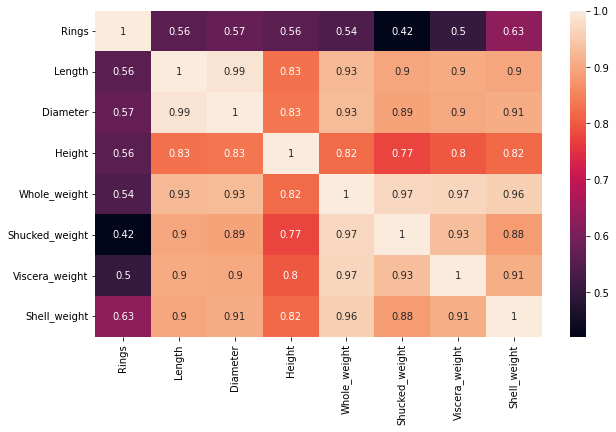

In [64]:
plt.figure(figsize = (10,6))
sns.heatmap(data = df.corr(), annot = True)

## Feature Relationship Visualization

In this section, we create scatter plots to visualize the relationships between key features and the target variable. These visualizations help us:

1. Understand how individual features relate to the target variable (Rings)
2. Identify potential non-linear relationships
3. Detect outliers or unusual patterns in the data

### Shell Weight vs. Rings
First, we examine how Shell Weight relates to the number of Rings (age).

<Axes: xlabel='Shell_weight', ylabel='Rings'>

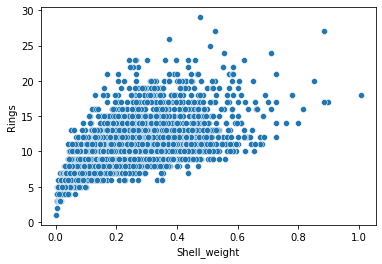

In [65]:
sns.scatterplot(x = X['Shell_weight'], y = y['Rings'])

### Height vs. Rings
Next, we examine how Height relates to the number of Rings.

<Axes: xlabel='Height', ylabel='Rings'>

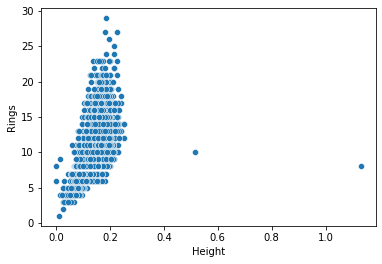

In [66]:
sns.scatterplot(x = X['Height'], y = y['Rings'])

### Diameter vs. Rings
We also examine how Diameter relates to the number of Rings.

<Axes: xlabel='Diameter', ylabel='Rings'>

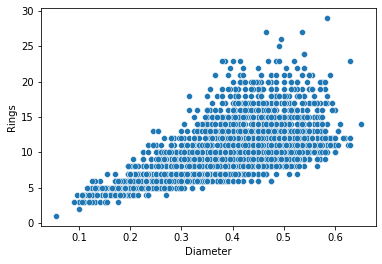

In [67]:
sns.scatterplot(x = X['Diameter'], y = y['Rings'])

### Height vs. Shell Weight
Finally, we examine the relationship between two features: Height and Shell Weight. This helps us understand if there's multicollinearity between these features.

<Axes: xlabel='Height', ylabel='Shell_weight'>

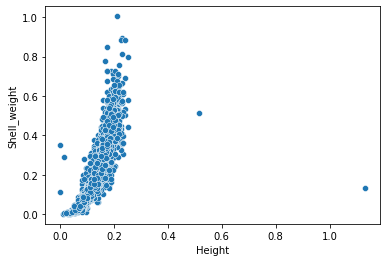

In [68]:
sns.scatterplot(x = X['Height'], y = X['Shell_weight'])

## Simple Cross-Validation Setup

Based on our exploratory analysis, we select the most promising features for our model. The scatter plots and correlation analysis suggest that 'Shell_weight' and 'Height' have strong relationships with the target variable (Rings).

In this section, we:

1. Select the features we'll use for modeling ('Shell_weight' and 'Height')
2. Split the data into training (70%) and test (30%) sets using scikit-learn's `train_test_split` function
3. Extract the indices of the training and test sets for later use in custom cross-validation
4. Check the type of the indices to ensure they're in the correct format

This simple train-test split is our first cross-validation approach, which we'll compare with more sophisticated methods later.

In [69]:
# simple cross-validation splitting the data into two subsets:
features_selected = ['Shell_weight', 'Height']

X_train, X_test, y_train, y_test = train_test_split(X[features_selected], y['Rings'], test_size=.3, shuffle = True ,random_state = 42)

training_indices = X_train.reset_index()['index']
dev_indices = X_test.reset_index()['index']
type(training_indices)

pandas.core.series.Series

## Model Pipeline Creation

In this section, we create a machine learning pipeline to predict the age of abalone (number of rings). The pipeline consists of three main components:

1. **Transformer**: We use `make_column_transformer` to create polynomial features (degree 3) from our selected features ('Shell_weight' and 'Height'). This allows the model to capture non-linear relationships between these features and the target variable.

2. **StandardScaler**: We standardize the features to have zero mean and unit variance. This is important because polynomial features can have very different scales, which can affect model performance.

3. **LinearRegression**: We use a linear regression model as our final estimator. Even though we're using polynomial features, the model itself is still linear in its parameters.

Using a pipeline ensures that all preprocessing steps are applied consistently during both training and prediction.


In [70]:
transformer = make_column_transformer(
                                      (PolynomialFeatures(degree = 3, include_bias=False), ['Shell_weight', 'Height']),
                                      #remainder='passthrough'
                                      )

pipel = Pipeline([
    ('tr',transformer),
    ('stdrd', StandardScaler()),
    ('lr',LinearRegression())
])

## Model Training and Evaluation with Simple Cross-Validation

Now we train our model on the training set and evaluate its performance on the test set. This is the simplest form of cross-validation, often called the holdout method.

In this section, we:

1. **Train the model**: Fit the pipeline on the training data
2. **Calculate performance metrics**:
   - Mean Squared Error (MSE): Average of squared differences between predicted and actual values
   - Root Mean Squared Error (RMSE): Square root of MSE, which is in the same units as the target variable
   - R-squared (R²): Proportion of variance in the target variable explained by the model

These metrics help us assess how well our model generalizes to unseen data. Note that we calculate R² on the training data to see how well the model fits the training set, while MSE and RMSE are calculated on the test data to evaluate generalization performance.


In [71]:
pipel.fit(X_train, y_train)
# mse 
mse_simplecv = np.round(mean_squared_error(pipel.predict(X_test) , y_test, squared = True), 3)
rmse_simplecv = np.round(mean_squared_error(pipel.predict(X_test) , y_test, squared = False), 3)
r2_simplecv = np.round(r2_score(pipel.predict(X_train) , y_train), 3)

print('Test MSE: ' + str(mse_simplecv) +'\nTest RMSE: ' + str(rmse_simplecv) +'\nR^2:' + str(r2_simplecv) )

Test MSE: 5.786
Test RMSE: 2.405
R^2:-0.361


## Advanced Cross-Validation Setup

In this section, we implement more sophisticated cross-validation techniques to find the optimal model hyperparameters. We create a new pipeline that:

1. Uses polynomial features with a flexible degree (to be tuned)
2. Applies standardization
3. Uses Ridge regression instead of simple linear regression, with a regularization parameter alpha (to be tuned)

We then use `GridSearchCV` to find the best combination of hyperparameters by trying:
- Different polynomial degrees: 2, 3, 4, and 5
- Different regularization strengths (alpha): 0.01, 0.1, 1, 10, and 100

We implement three different cross-validation strategies:

1. **Simple CV**: Using our predefined training and test sets
2. **K-Fold CV (k=5)**: Splitting the data into 5 folds, where each fold serves as the test set once
3. **K-Fold CV (k=10)**: Splitting the data into 10 folds for more robust validation

This allows us to compare the effectiveness of different cross-validation techniques for our specific dataset.


In [72]:
transformer = make_column_transformer(
                                      (PolynomialFeatures(include_bias=False), ['Shell_weight', 'Height'])
                                      #remainder='passthrough'
                                      )

pipel = Pipeline([
    ('tr',transformer),
    ('stdrd', StandardScaler()),
    ('lr',Ridge())
])

parameters_to_try = {
    'tr__polynomialfeatures__degree': [2, 3, 4, 5],
    'lr__alpha': [0.01, 0.1, 1, 10, 100]
}


modelfinder_simplecv = GridSearchCV(
    estimator = pipel,
    param_grid= parameters_to_try,
    scoring= 'neg_mean_squared_error',
    cv = [[training_indices, dev_indices]]
).fit(X, y)


modelfinder_kfold5cv = GridSearchCV(
    estimator = pipel,
    param_grid= parameters_to_try,
    scoring= 'neg_mean_squared_error',
    cv = 5
).fit(X, y)


modelfinder_kfold10cv = GridSearchCV(
    estimator = pipel,
    param_grid= parameters_to_try,
    scoring= 'neg_mean_squared_error',
    cv = 10
).fit(X, y)


## Evaluating Cross-Validation Results

Now we'll examine the results of our different cross-validation approaches. For each approach, we'll:

1. Display the best model configuration found by GridSearchCV
2. Extract and display the mean test score for the best model

This allows us to compare the optimal hyperparameters selected by each cross-validation strategy and their respective performance.

### Simple Cross-Validation Results

First, let's examine the results from our simple train-test split approach:

In [73]:
modelfinder_simplecv.best_estimator_

Pipeline(steps=[('tr',
 ColumnTransformer(transformers=[('polynomialfeatures',
 PolynomialFeatures(degree=3,
 include_bias=False),
 ['Shell_weight',
 'Height'])])),
 ('stdrd', StandardScaler()), ('lr', Ridge(alpha=0.01))]) In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook. On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org. Pipeline Pipeline(steps=[('tr',
 ColumnTransformer(transformers=[('polynomialfeatures',
 PolynomialFeatures(degree=3,
 include_bias=False),
 ['Shell_weight',
 'Height'])])),
 ('stdrd', StandardScaler()), ('lr', Ridge(alpha=0.01))]) tr: ColumnTransformer ColumnTransformer(transformers=[('polynomialfeatures',
 PolynomialFeatures(degree=3,
 include_bias=False),
 ['Shell_weight', 'Height'])]) polynomialfeatures ['Shell_weight', 'Height'] PolynomialFeatures PolynomialFeatures(degree=3, include_bias=False) StandardScaler StandardScaler() Ridge Ridge(alpha=0.01)

Here we extract the mean test score for the best model found using simple cross-validation:

In [81]:
mean_test_scorescv = pd.DataFrame(modelfinder_simplecv.cv_results_).query('rank_test_score == 1')['mean_test_score']

np.round(-mean_test_scorescv,  3)

1 5.786
Name: mean_test_score, dtype: float64

### 5-Fold Cross-Validation Results

Next, let's examine the results from 5-fold cross-validation:

In [75]:
modelfinder_kfold5cv.best_estimator_

Pipeline(steps=[('tr',
 ColumnTransformer(transformers=[('polynomialfeatures',
 PolynomialFeatures(include_bias=False),
 ['Shell_weight',
 'Height'])])),
 ('stdrd', StandardScaler()), ('lr', Ridge(alpha=10))]) In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook. On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org. Pipeline Pipeline(steps=[('tr',
 ColumnTransformer(transformers=[('polynomialfeatures',
 PolynomialFeatures(include_bias=False),
 ['Shell_weight',
 'Height'])])),
 ('stdrd', StandardScaler()), ('lr', Ridge(alpha=10))]) tr: ColumnTransformer ColumnTransformer(transformers=[('polynomialfeatures',
 PolynomialFeatures(include_bias=False),
 ['Shell_weight', 'Height'])]) polynomialfeatures ['Shell_weight', 'Height'] PolynomialFeatures PolynomialFeatures(include_bias=False) StandardScaler StandardScaler() Ridge Ridge(alpha=10)

Here we extract the mean test score for the best model found using 5-fold cross-validation:

In [83]:
mean_test_score5k = pd.DataFrame(modelfinder_kfold5cv.cv_results_).query('rank_test_score == 1')['mean_test_score']

np.round(-mean_test_score5k,  3)

12 6.681
Name: mean_test_score, dtype: float64

### 10-Fold Cross-Validation Results

Finally, let's examine the results from 10-fold cross-validation:

In [84]:
modelfinder_kfold10cv.best_estimator_

Pipeline(steps=[('tr',
 ColumnTransformer(transformers=[('polynomialfeatures',
 PolynomialFeatures(include_bias=False),
 ['Shell_weight',
 'Height'])])),
 ('stdrd', StandardScaler()), ('lr', Ridge(alpha=10))]) In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook. On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org. Pipeline Pipeline(steps=[('tr',
 ColumnTransformer(transformers=[('polynomialfeatures',
 PolynomialFeatures(include_bias=False),
 ['Shell_weight',
 'Height'])])),
 ('stdrd', StandardScaler()), ('lr', Ridge(alpha=10))]) tr: ColumnTransformer ColumnTransformer(transformers=[('polynomialfeatures',
 PolynomialFeatures(include_bias=False),
 ['Shell_weight', 'Height'])]) polynomialfeatures ['Shell_weight', 'Height'] PolynomialFeatures PolynomialFeatures(include_bias=False) StandardScaler StandardScaler() Ridge Ridge(alpha=10)

Here we extract the mean test score for the best model found using 10-fold cross-validation:

In [82]:
mean_test_score10k = pd.DataFrame(modelfinder_kfold10cv.cv_results_).query('rank_test_score == 1')['mean_test_score']

np.round(-mean_test_score10k,  3)

12 6.482
Name: mean_test_score, dtype: float64

## Final Model Comparison

Now that we've found the best models using different cross-validation techniques, we'll compare their performance on the same test and training sets. This allows us to:

1. Evaluate how well each model generalizes to unseen data
2. Check for potential overfitting by comparing training and test errors
3. Determine which cross-validation technique led to the most robust model

For each model, we calculate:
- Test MSE: Mean Squared Error on the test set
- Train MSE: Mean Squared Error on the training set

A good model should have low error on both sets, with the test error not being significantly higher than the training error.

### Simple Cross-Validation Model Performance


In [78]:
print("Simple CV TEST MSE: " + str( mean_squared_error(modelfinder_simplecv.best_estimator_.predict(X_test), y_test) ) )

print("Simple CV TRAIN MSE: " + str( mean_squared_error(modelfinder_simplecv.best_estimator_.predict(X_train), y_train) ) )

Simple CV TEST MSE: 5.775918063162077
Simple CV TRAIN MSE: 6.047344214180365


### 5-Fold Cross-Validation Model Performance

In [79]:
print("5 KFOLD CV TEST MSE: " + str( mean_squared_error(modelfinder_kfold5cv.best_estimator_.predict(X_test), y_test) ) )

print("5 KFOLD CV TRAIN MSE: " + str( mean_squared_error(modelfinder_kfold5cv.best_estimator_.predict(X_train), y_train) ) )

5 KFOLD CV TEST MSE: 5.803236666159533
5 KFOLD CV TRAIN MSE: 6.072705776691962


### 10-Fold Cross-Validation Model Performance

In [80]:
print("10 KFOLD CV TEST MSE: " + str( mean_squared_error(modelfinder_kfold10cv.best_estimator_.predict(X_test), y_test) ) )

print("10 KFOLD CV TRAIN MSE: " + str( mean_squared_error(modelfinder_kfold10cv.best_estimator_.predict(X_train), y_train) ) )

10 KFOLD CV TEST MSE: 5.803236666159533
10 KFOLD CV TRAIN MSE: 6.072705776691962


## Conclusion

In this notebook, we explored different cross-validation techniques for predicting the age of abalone from physical measurements. We compared three approaches:

1. **Simple Cross-Validation**: A basic train-test split
2. **5-Fold Cross-Validation**: Dividing the data into 5 folds
3. **10-Fold Cross-Validation**: Dividing the data into 10 folds